# DAT203 Project
## Kaggle_Video Game Sales

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression
def Lin(x_train, y_train, x_test, y_test):
    Lin = LinearRegression()
    Lin.fit(x_train,y_train)
    pred = Lin.predict(x_test)
    mse = np.mean((pred - y_test)**2)
    sc = Lin.score(x_test,y_test)
    return (mse, sc)

In [16]:
from sklearn.linear_model import Ridge
def Rig(alpha, x_train, y_train, x_test, y_test):
    Rig = Ridge(alpha = alpha, normalize = True)
    Rig.fit(x_train, y_train)
    pred = Rig.predict(x_test)
    mse = np.mean((pred - y_test)**2)
    sc = Rig.score(x_test,y_test)
    return (mse, sc)

In [17]:
from sklearn.linear_model import Lasso
def Las(alpha, x_train, y_train, x_test, y_test):
    Las = Lasso(alpha = alpha, normalize = True)
    Las.fit(x_train, y_train)
    pred = Las.predict(x_test)
    mse = np.mean((pred - y_test)**2)
    sc = Las.score(x_test,y_test)
    return (mse, sc)

In [124]:
from sklearn.ensemble import RandomForestRegressor
def Rm(random_state,x_train, y_train, x_test, y_test):
    RM = RandomForestRegressor(random_state = random_state)
    RM.fit(x_train, y_train)
    pred = RM.predict(x_test)
    mse = np.mean((pred - y_test)**2)
    sc = RM.score(x_test,y_test)
    im = RM.feature_importances_
    return (mse, sc, im)

In [55]:
df = pd.read_csv('vgsales.csv')

Data Cleaning

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [56]:
# drop data that has null value and features that have little economic impact on the target 'Rank' or contain too
# many unique values that make it difficult to run regression
df = df.dropna(axis = 0, how = 'any')
df = df.drop(columns=['Name', 'Platform','Publisher'])

In [57]:
# convert categorical feature to dummy variables
df_gen = pd.get_dummies(df['Genre'])

In [88]:
df_concat = pd.concat([df,df_gen], axis=1)
df_concat.head()

,Rank,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1,2006.0,Sports,41.49,29.02,3.77,8.46,82.74,0,0,0,0,0,0,0,0,0,0,1,0
1,2,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,0,0,0,0,1,0,0,0,0,0,0,0
2,3,2008.0,Racing,15.85,12.88,3.79,3.31,35.82,0,0,0,0,0,0,1,0,0,0,0,0
3,4,2009.0,Sports,15.75,11.01,3.28,2.96,33.00,0,0,0,0,0,0,0,0,0,0,1,0
4,5,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,0,0,0,0,0,0,0,1,0,0,0,0


In [89]:
df_concat = df_concat.drop(columns='Genre')

In [90]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Year          16291 non-null  float64
 2   NA_Sales      16291 non-null  float64
 3   EU_Sales      16291 non-null  float64
 4   JP_Sales      16291 non-null  float64
 5   Other_Sales   16291 non-null  float64
 6   Global_Sales  16291 non-null  float64
 7   Action        16291 non-null  uint8  
 8   Adventure     16291 non-null  uint8  
 9   Fighting      16291 non-null  uint8  
 10  Misc          16291 non-null  uint8  
 11  Platform      16291 non-null  uint8  
 12  Puzzle        16291 non-null  uint8  
 13  Racing        16291 non-null  uint8  
 14  Role-Playing  16291 non-null  uint8  
 15  Shooter       16291 non-null  uint8  
 16  Simulation    16291 non-null  uint8  
 17  Sports        16291 non-null  uint8  
 18  Strategy      16291 non-nu

Introduce correlation matrix to figure out whether there is multicollinearity between different features.

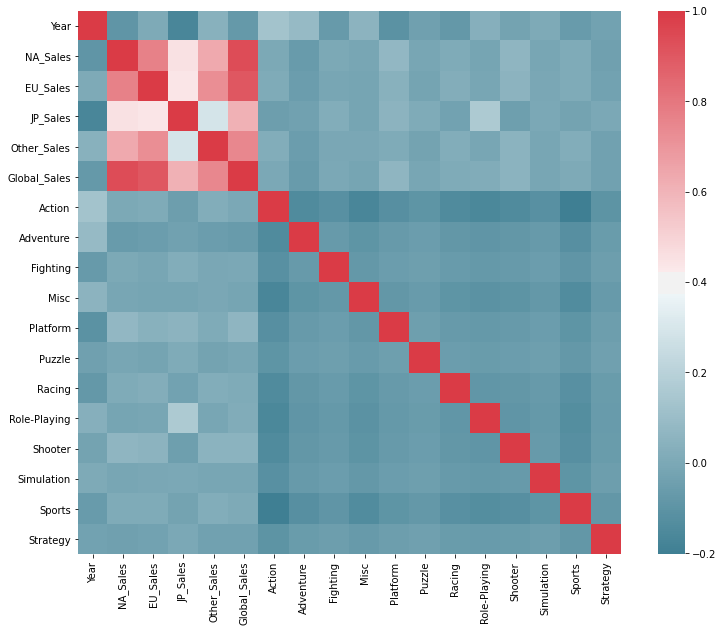

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_concat.iloc[:,1:].corr()
plt.figure(figsize = (13,10))
ax = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [94]:
# drop 'NA_Sales','EU_Sales','JP_Sales','Other_Sales' because they are multilinear with 'Global_Sales'
df_concat = df_concat.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [95]:
target = df_concat['Rank']
feature = df_concat.iloc[:,1:]

In [96]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.3,random_state=100)

Run linear regression

In [97]:
Lin(x_train, y_train, x_test, y_test)

(17113657.657860603, 0.2742266073928875)

Tuning the model with penalty: Ridge

In [130]:
Rig(0.05,x_train, y_train, x_test, y_test)

(17217889.019053385, 0.26980625786029355)

Tuning the model with penalty: Lasso

In [131]:
Las(0.05,x_train, y_train, x_test, y_test)

(17119197.703576397, 0.27399165950186843)

Tuning the model with ensemble learning method: RandomForest Regression

In [125]:
Rm(100, x_train, y_train, x_test, y_test)

(21982.44834455935,
 0.9990677459820804,
 array([1.98971931e-04, 9.99625744e-01, 1.91041183e-05, 1.60309341e-05,
        1.29592218e-05, 1.59768270e-05, 1.13684331e-05, 9.86218257e-06,
        1.41721348e-05, 1.60368303e-05, 1.47983460e-05, 1.32615333e-05,
        1.64894016e-05, 1.52241857e-05]))

Linear regression with out penalty introduced, Ridge regresson that introduces L2 regularization and Lasso regression that introduces L1 regularization do not perform as well as Random Forest regression. Therefore, we can say that Random Forest fits the dataset better and should use it to discover the relationship between game rank and various features.

Based on the results generated by Random Forest regression, the most important feature is 'Globl_Sales'. The most popular genre that contributes to the rank is Action, then Sports, and the least popular one is Puzzle.

However, the drawback of Random Forest is that it can not provide us with coefficients of each features.